In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import datetime
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer,confusion_matrix
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
import graphviz
import xgboost as xgb
from scipy.stats import uniform, randint
#from xgboost import plot_importance
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import joblib
from sklearn.ensemble import VotingClassifier
import itertools

from sklearn.metrics import accuracy_score

from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.neighbors import LocalOutlierFactor
from gensim.models import word2vec;print("FAST_VERSION", word2vec.FAST_VERSION)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score,recall_score
#from sklearn.metrics import recall_score, average_precision_score, auc
from catboost import CatBoostClassifier
import scikitplot as skplt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

FAST_VERSION 0


In [3]:
df = pd.read_excel('./data/fi작업_데이터파일.xlsx', engine='openpyxl')

In [4]:
df_no_p_number = df.drop('patent_number', axis=1)
df_no_p_number['promising_patent'] = df_no_p_number['promising_patent'].astype('category')

X = df_no_p_number.loc[:, df_no_p_number.columns!= 'promising_patent']
y = df_no_p_number['promising_patent']

In [5]:
X.dtypes

num_cited                          int64
originality                      float64
radicalness                      float64
LOF                              float64
TCT                              float64
IKC                                int64
IKA                                int64
num_npl                            int64
broad_impact                     float64
examiner_impact                    int64
heterogeneity                    float64
under_examination_claim_index    float64
examiner_type                      int64
dtype: object

In [6]:
y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

Number transactions X_train dataset:  (11993, 13)
Number transactions y_train dataset:  (11993,)
Number transactions X_test dataset:  (2999, 13)
Number transactions y_test dataset:  (2999,)
Before OverSampling, counts of label '1' in train: 1269
Before OverSampling, counts of label '0' in train: 10724 

Before OverSampling, counts of label '1' in test: 317
Before OverSampling, counts of label '0' in test: 2682 

After OverSampling, the shape of train_X_res: (21448, 13)
After OverSampling, the shape of train_y_res: (21448,) 

After OverSampling, counts of label '1' in train_res: 10724
After OverSampling, counts of label '0' in train_res: 10724


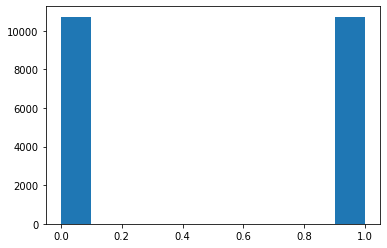

In [7]:
#%%
########################################################################
# train : validation : test = 6:2:2
########################################################################
X_variable=X.columns

min_max_scaler = MinMaxScaler()

X_minmax = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=1, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1' in train: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0' in train: {} \n".format(sum(y_train==0)))

print("Before OverSampling, counts of label '1' in test: {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0' in test: {} \n".format(sum(y_test==0)))
########################################################################
#Oversampling
########################################################################
sm = SMOTE(random_state=2,k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X_res: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y_res: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1' in train_res: {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0' in train_res: {}".format(sum(y_train_res==0)))


plt.hist(y_train_res)
plt.draw()

In [8]:
def model_metrics(y_test, y_pred):
    test_score = round(metrics.accuracy_score(y_test, y_pred), 3)
    print('Accuracy of  model : ', test_score)
    
    
    f1=round(f1_score(y_test, y_pred.round(), average='weighted'),3)
    roc_score=np.round(roc_auc_score(y_test, y_pred.round(), average='weighted'), decimals=4)
    recall = np.round(recall_score(y_test, y_pred.round(), average='weighted'), decimals=3)
    precis= np.round(precision_score(y_test, y_pred.round(), average='weighted'), decimals=3)
    print('f1 score: ', f1)
    print('auc  score: ', roc_score)
    print('recall score: ', recall)
    print('precision  score: ', precis)
    
    skplt.metrics.plot_confusion_matrix(y_test, y_pred.round())
    print('\n')
    print(classification_report(y_test, y_pred))

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label, color='red')
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.title('Receiver Operating Curve(ROC)', fontsize=18)
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    #plt.legend(True)
    plt.grid(True)
    plt.show()

In [8]:
#%%
# Create a Logistic regression classifier

logreg = LogisticRegression(max_iter=8000)

grid={"C":np.logspace(-4, 4, 50), "penalty":["l2"]}
grid_log=GridSearchCV(logreg,grid,cv=10)
# Train the model using the training sets 
grid_log.fit(X_train_res, y_train_res.ravel())
print("tuned hpyerparameters :(best parameters) ",grid_log.best_params_)
print("best model: ", grid_log.best_estimator_)
print("accuracy :",grid_log.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 232.99518105153672, 'penalty': 'l2'}
best model:  LogisticRegression(C=232.99518105153672, max_iter=8000)
accuracy : 0.6562383232439203


In [9]:
grid_log.best_params_

{'C': 232.99518105153672, 'penalty': 'l2'}

Accuracy of  model :  0.644
f1 score:  0.713
auc  score:  0.6634
recall score:  0.644
precision  score:  0.865


              precision    recall  f1-score   support

           0       0.95      0.64      0.76      2682
           1       0.18      0.69      0.29       317

    accuracy                           0.64      2999
   macro avg       0.56      0.66      0.53      2999
weighted avg       0.86      0.64      0.71      2999



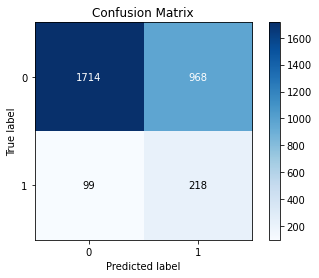

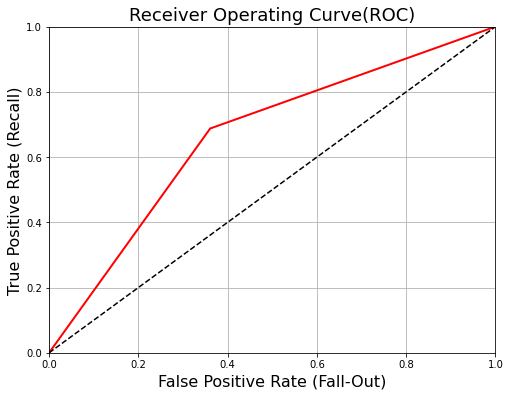

In [10]:
# Create a Logistic regression classifier
# Parameter setting based on GridsearchCV
logreg = grid_log.best_estimator_

logreg.fit(X_train_res, y_train_res)
# Prediction on test data
y_pred_LF = logreg.predict(X_test)
model_metrics(y_test,y_pred_LF)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LF) 
plot_roc_curve(fpr, tpr)

In [11]:
# logistic regression 모델 저장
joblib.dump(logreg, './logreg_grid.pkl')

['./logreg_grid.pkl']

In [12]:
#%%
# Create a Decision tree classifier model
clf = DecisionTreeClassifier()
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [6, 8, 10, 12, 16, 20, 24], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_dt = GridSearchCV(clf, parameters,cv=5,n_jobs=-1)
grid_dt = grid_dt.fit(X_train_res, y_train_res.ravel())
print('GridSearchCV 최적 하이퍼파라미터: ', grid_dt.best_params_)

GridSearchCV 최적 하이퍼파라미터:  {'criterion': 'entropy', 'max_depth': 24, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}


Accuracy of  model :  0.79
f1 score:  0.815
auc  score:  0.6278
recall score:  0.79
precision  score:  0.851


              precision    recall  f1-score   support

           0       0.92      0.83      0.88      2682
           1       0.23      0.42      0.30       317

    accuracy                           0.79      2999
   macro avg       0.58      0.63      0.59      2999
weighted avg       0.85      0.79      0.82      2999



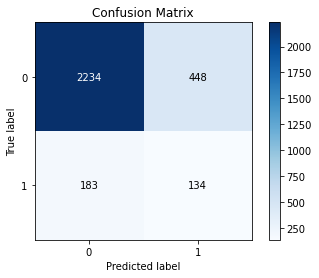

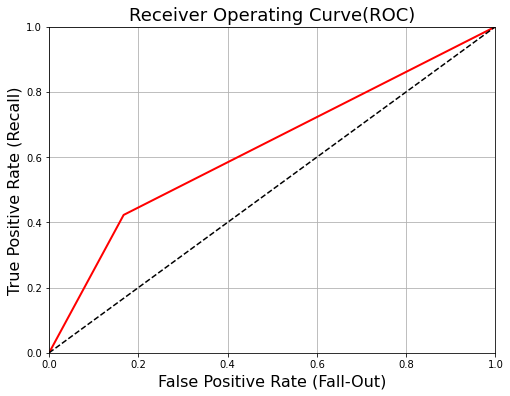

In [13]:
# Create a Decision tree classifier model
# Parameter setting based on GridsearchCV
clf = grid_dt.best_estimator_

# Train the model using the training sets 
clf.fit(X_train_res, y_train_res)
# Prediction on test set
y_pred_dt= clf.predict(X_test)
# Calculating the accuracy
model_metrics(y_test,y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt) 
plot_roc_curve(fpr, tpr)

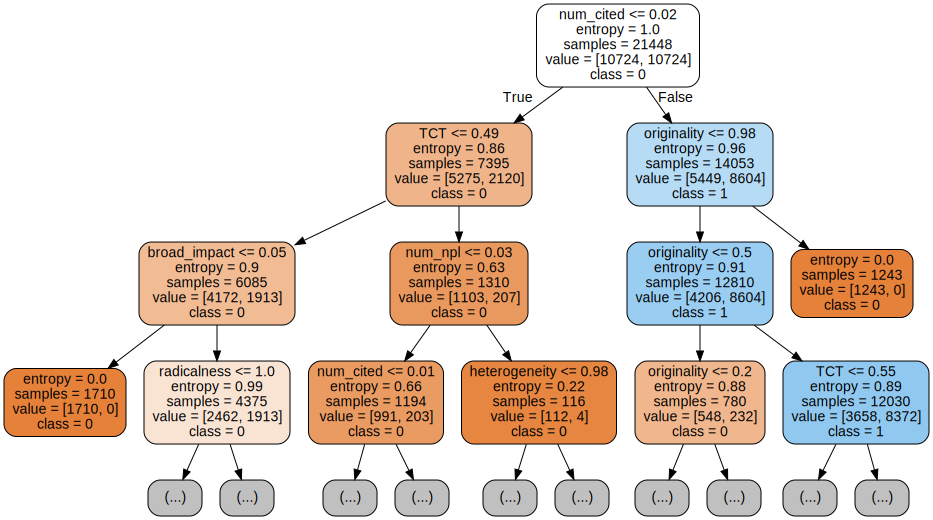

In [14]:
#%%
#tree visualization
from sklearn.tree import export_graphviz

#export_graphviz(clf, out_file='tree.dot')
export_graphviz(clf, out_file='decision_tree.dot', 
                feature_names = X.columns,
                class_names = ["0","1"],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 2, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

with open("decision_tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [15]:
# dt 모델 저장
joblib.dump(clf, './dt_grid.pkl')

['./dt_grid.pkl']

In [16]:
#%%
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [300,400,500], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [6, 8, 10, 12], 
              'min_samples_split': [3, 8, 12, 18],
              'min_samples_leaf': [2, 4, 6]
             }

# Run the grid search
random_forest_grid = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
rf_grid = random_forest_grid.fit(X_train_res, y_train_res)


In [17]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 400}

In [18]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=400)

Accuracy of  model :  0.778
f1 score:  0.812
auc  score:  0.6893
recall score:  0.778
precision  score:  0.869


              precision    recall  f1-score   support

           0       0.94      0.80      0.87      2682
           1       0.26      0.58      0.35       317

    accuracy                           0.78      2999
   macro avg       0.60      0.69      0.61      2999
weighted avg       0.87      0.78      0.81      2999



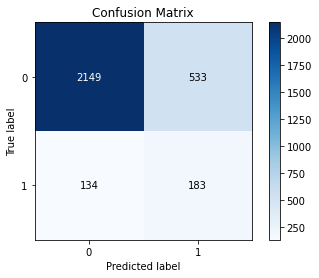

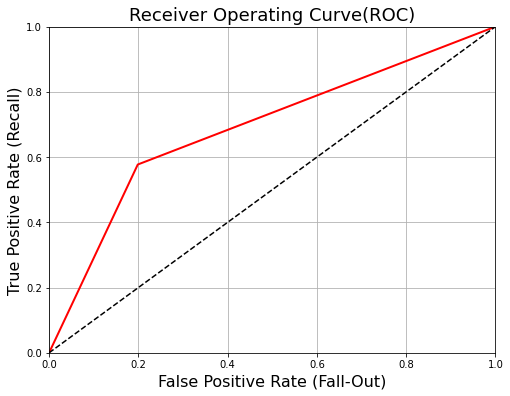

In [19]:
# # Create a Random Forest Classifier
# # Parameter setting based on GridsearchCV
# rf = RandomForestClassifier(criterion='gini',
#  max_depth=12,
#  max_features='log2',
#  min_samples_leaf=2,
#  min_samples_split=3,
#  n_estimators=1000)
rf = rf_grid.best_estimator_

# Train the model using the training sets 
rf.fit(X_train_res, y_train_res.ravel())

# Prediction on test data
y_pred_rf = rf.predict(X_test)

# Calculating the accuracy
model_metrics(y_test,y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf) 
plot_roc_curve(fpr, tpr)

In [20]:
featureImpList= []
for feat, importance in zip(X.columns, rf.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

                          Feature  Importance
8                    broad_impact   26.549732
1                     originality   19.501588
0                       num_cited   13.309541
6                             IKA   10.079399
11  under_examination_claim_index    6.324935
7                         num_npl    6.275353
4                             TCT    5.086208
2                     radicalness    3.506400
10                  heterogeneity    3.202636
5                             IKC    2.878274
3                             LOF    2.768376
12                  examiner_type    0.335806
9                 examiner_impact    0.181753


In [21]:
# rf 모델 저장
joblib.dump(rf, './rf_grid.pkl')

['./rf_grid.pkl']

In [ ]:
#%%
# ligthgbm
# Parameter setting based on GridsearchCV
params = {
    'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 1000, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': 15, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}

mdl = lgb.LGBMClassifier( 
          n_jobs = -1, 
          silent = True,
          max_depth = params['max_depth'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

#x_train = svc.fit_transform(X_train_res)
#x_test = svc.transform(X_test)
#train_ds = lgb.Dataset(x_train, label = y_train_res.ravel()) 
#test_ds = lgb.Dataset(x_test, label = y_test) 

gridParams = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100,200,300],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.7, 0.8, 0.9],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    'num_iterations': [1000, 2000]
    }
lgb_grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
lgb_grid.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


C:\Users\Woojin\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Woojin\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=15, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      silent=True, subsample=1,
                                      subsample_for_bin=200),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_bin': [255, 510],
                         'n_estimators': [100, 200, 300],
                         'num_iterations': [1000, 2000],
                         'num_leaves': [6, 8, 12, 16], 'objective': ['binary'],
                         'random_state': [500], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4]},
             verbose=1)

In [48]:
lgb_grid.best_params_

NameError: name 'lgb_grid' is not defined

In [54]:
# Call model
light_grid = joblib.load('./lightGBM_grid.pkl')

C:\Users\Woojin\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Woojin\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Accuracy of  model :  0.847
f1 score:  0.852
auc  score:  0.6319
recall score:  0.847
precision  score:  0.858


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2682
           1       0.31      0.36      0.33       317

    accuracy                           0.85      2999
   macro avg       0.62      0.63      0.62      2999
weighted avg       0.86      0.85      0.85      2999



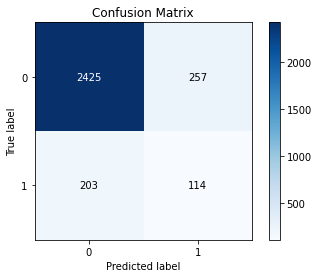

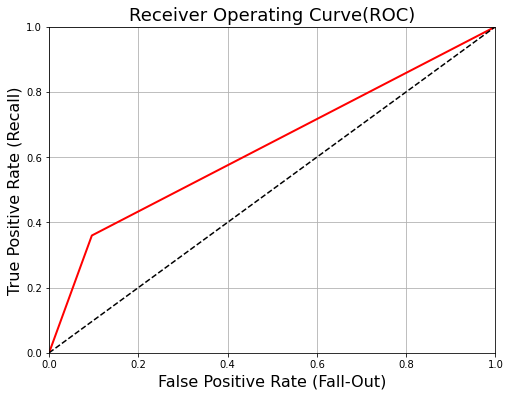

In [55]:
# light_grid = lgb_grid.best_estimator_
# Train the model using the training sets 
light_grid.fit(X_train_res, y_train_res.ravel())

# Prediction on test data
y_pred_light = light_grid.predict(X_test)

model_metrics(y_test,y_pred_light)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_light) 
plot_roc_curve(fpr, tpr)

In [ ]:
# lightgbm 모델 저장
joblib.dump(light_grid, './lightGBM_grid.pkl')

['./lightGBM_grid.pkl']

In [24]:
#xgb
xgb_model = xgb.XGBClassifier()


gridParams = {
    'learning_rate': [0.01, 0.1],
    'gamma': [0.5, 1, 1.5],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [1000],
    'num_leaves': [6,8,12,16], 
    'boosting_type' : ['gbtree', 'dart'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.7, 0.9],
    }

xgboost_grid = GridSearchCV(xgb_model,gridParams,cv=3, verbose=1, n_jobs=-1)

xgboost_grid.fit(X_train_res, y_train_res.ravel())




Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\Woojin\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "boosting_type", "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbtr

In [25]:
xgboost_grid.best_params_

{'boosting_type': 'gbtree',
 'colsample_bytree': 0.9,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_bin': 255,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'num_leaves': 6,
 'random_state': 500}

[15:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "boosting_type", "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of  model :  0.878
f1 score:  0.864
auc  score:  0.5896
recall score:  0.878
precision  score:  0.855


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2682
           1       0.37      0.22      0.28       317

    ac

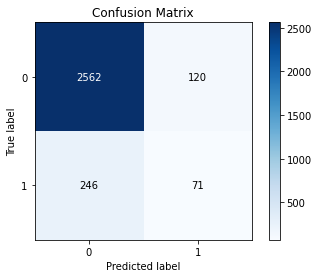

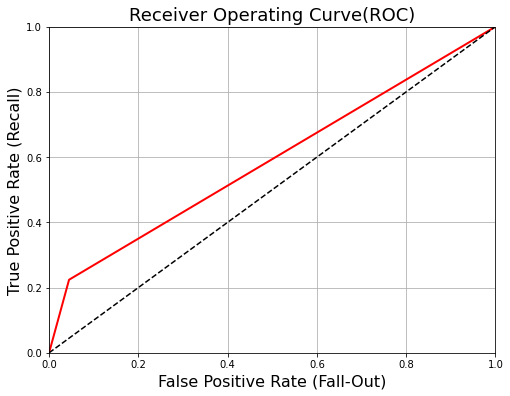

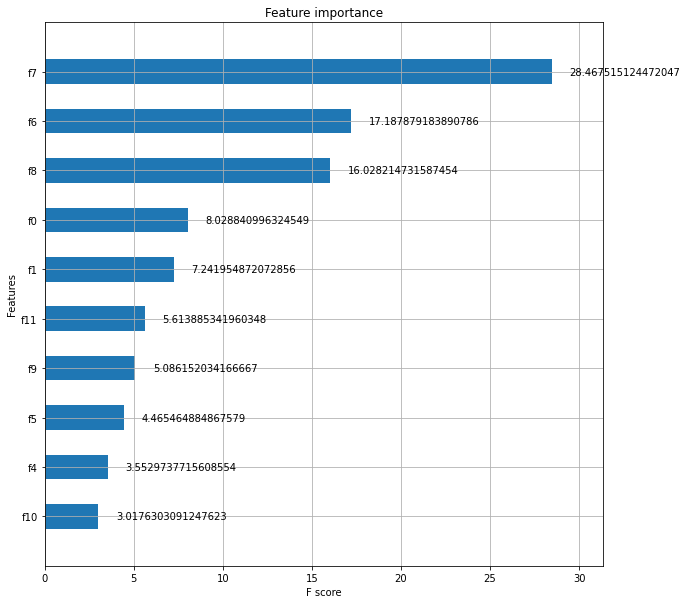

In [26]:
xgb_grid = xgboost_grid.best_estimator_

xgb_grid.fit(X_train_res, y_train_res.ravel())

y_pred_xgb= xgb_grid.predict(X_test)

# Calculating the accuracy
model_metrics(y_test,y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb) 
plot_roc_curve(fpr, tpr)

#xgb feature importance

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_grid, max_num_features=10, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [27]:
# xgboost 모델 저장
joblib.dump(xgb_grid, './xgboost_grid.pkl')

['./xgboost_grid.pkl']

In [28]:
#%%
#adaboost

n_estimators = [300,400,500];
#cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)
learning_r = [0.01, 0.1]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
adaboost_grid = GridSearchCV(AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=5)
                                     ),
                                 param_grid=parameters,
                                 cv=5,
                                 n_jobs = -1)
            
adaboost_grid.fit(X_train_res, y_train_res) 



GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [300, 400, 500]})

In [29]:
adaboost_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

Accuracy of  model :  0.868
f1 score:  0.858
auc  score:  0.5866
recall score:  0.868
precision  score:  0.85


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2682
           1       0.32      0.23      0.27       317

    accuracy                           0.87      2999
   macro avg       0.62      0.59      0.60      2999
weighted avg       0.85      0.87      0.86      2999



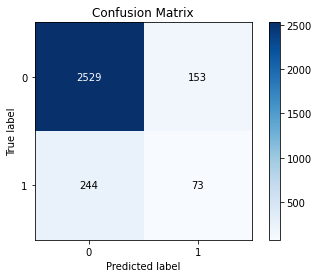

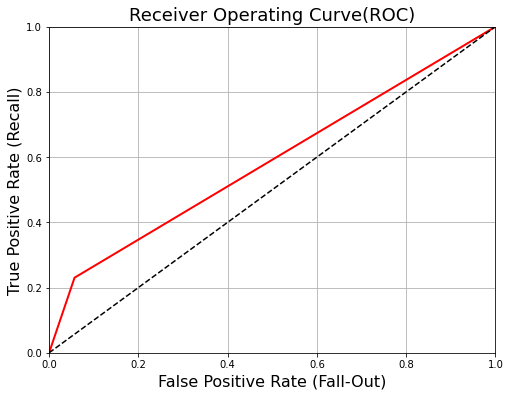

In [30]:
# Train the model using the training sets 
adab_grid = adaboost_grid.best_estimator_
adab_grid.fit(X_train_res, y_train_res.ravel())

# Prediction on test data
y_pred_ada = adab_grid.predict(X_test)

# Calculating the accuracy
model_metrics(y_test,y_pred_ada)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada) 
plot_roc_curve(fpr, tpr)

In [31]:
# adaboost 모델 저장
joblib.dump(adab_grid, './adaboost_grid.pkl')

['./adaboost_grid.pkl']

In [32]:
#%%
# Gradient Boosting
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.1],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[12,15],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.7,0.75],
    "n_estimators":[100, 300]
    }

clf_gb = GridSearchCV(GradientBoostingClassifier(), parameters,cv=3,n_jobs=-1)
clf_gb.fit(X_train, y_train.ravel())




GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.1], 'loss': ['deviance'],
                         'max_depth': [12, 15],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 300], 'subsample': [0.7, 0.75]})

In [33]:
print(clf_gb.best_params_)
print(clf_gb.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 0.7}
0.8976069846281659


Accuracy of  model :  0.86
f1 score:  0.855
auc  score:  0.5988
recall score:  0.86
precision  score:  0.851


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2682
           1       0.31      0.27      0.29       317

    accuracy                           0.86      2999
   macro avg       0.61      0.60      0.60      2999
weighted avg       0.85      0.86      0.86      2999



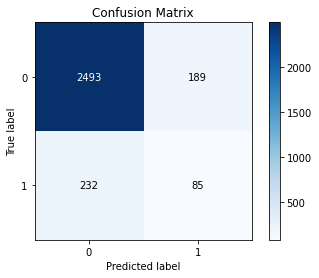

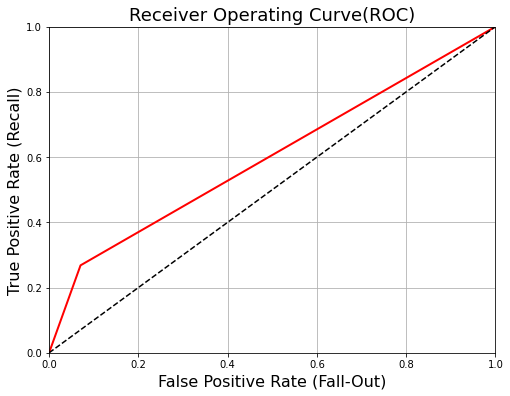

In [34]:
grb = clf_gb.best_estimator_
grb.fit(X_train_res, y_train_res.ravel())
# print(clf.score(X_train_res, y_train_res.ravel()))
# print(clf.best_params_)

y_pred_gb= grb.predict(X_test)

model_metrics(y_test,y_pred_gb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb) 
plot_roc_curve(fpr, tpr)

In [27]:
# gradient boosting 모델 저장
joblib.dump(grb, './gradient_boosting_grid.pkl')

['./gradient_boosting_grid.pkl']

Accuracy of  model :  0.851
f1 score:  0.858
auc  score:  0.6594
recall score:  0.851
precision  score:  0.866


              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2682
           1       0.34      0.42      0.37       317

    accuracy                           0.85      2999
   macro avg       0.63      0.66      0.64      2999
weighted avg       0.87      0.85      0.86      2999



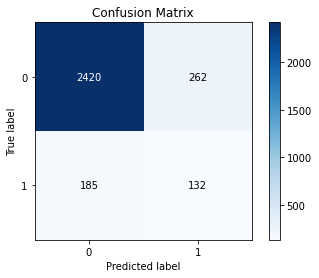

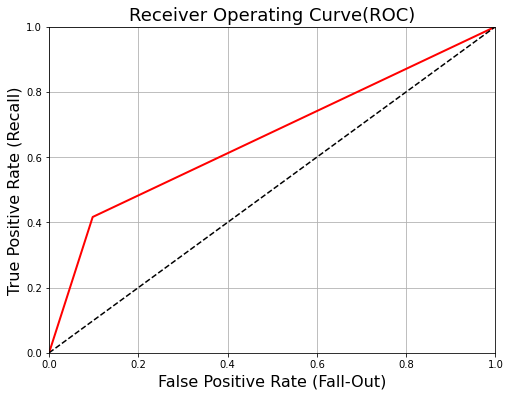

In [47]:
# Ensemble model 1

voting_model_1= VotingClassifier(estimators=[('lr', logreg), ('rf',rf), ('xgb',xgb_grid)], voting='soft', n_jobs=-1)

voting_model_1.fit(X_train_res, y_train_res)

y_pred_vot = voting_model_1.predict(X_test)
model_metrics(y_test,y_pred_vot)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot) 
plot_roc_curve(fpr, tpr)

In [48]:
# ensemble 모델 저장
joblib.dump(voting_model_1, './voting_model_1.pkl')

['./voting_model_1.pkl']

In [38]:
# Ensemble model 2

voting_model_2 = VotingClassifier(estimators=[('rf',rf), ('gradient_boosting',grb)], voting='soft', n_jobs=-1)

voting_model_2.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=12,
                                                     max_features='log2',
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_estimators=400)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(max_depth=15,
                                                         max_features='log2',
                                                         subsample=0.7))],
                 n_jobs=-1, voting='soft')

Accuracy of  model :  0.851
f1 score:  0.855
auc  score:  0.6303
recall score:  0.851
precision  score:  0.858


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2682
           1       0.32      0.35      0.33       317

    accuracy                           0.85      2999
   macro avg       0.62      0.63      0.62      2999
weighted avg       0.86      0.85      0.85      2999



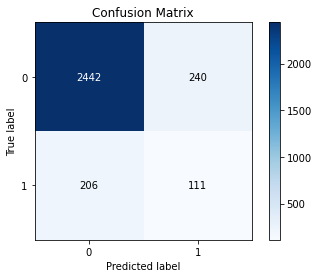

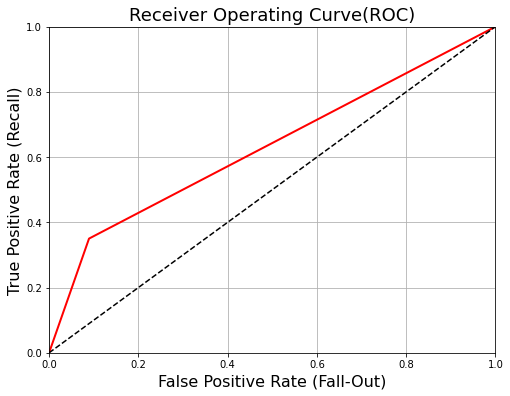

In [39]:
y_pred_vot = voting_model_2.predict(X_test)
model_metrics(y_test,y_pred_vot)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot) 
plot_roc_curve(fpr, tpr)

In [40]:
# ensemble 모델 저장
joblib.dump(voting_model_2, './voting_model_2.pkl')

['./voting_model_2.pkl']

Accuracy of  model :  0.769
f1 score:  0.807
auc  score:  0.7081
recall score:  0.769
precision  score:  0.874


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2682
           1       0.26      0.63      0.37       317

    accuracy                           0.77      2999
   macro avg       0.60      0.71      0.61      2999
weighted avg       0.87      0.77      0.81      2999



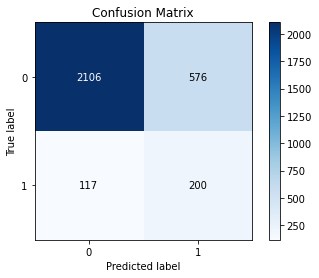

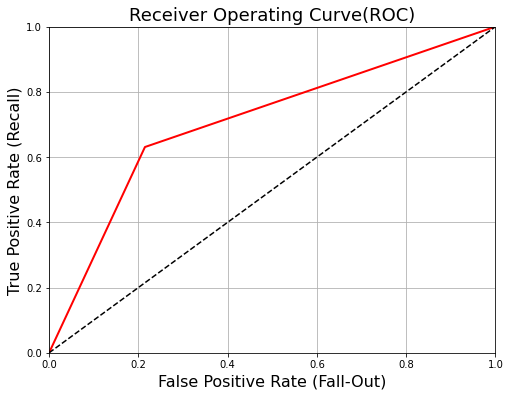

In [56]:
# Ensemble model 3

voting_model_3= VotingClassifier(estimators=[('lr',logreg), ('rf',rf)], voting='soft', n_jobs=-1)

voting_model_3.fit(X_train_res, y_train_res)

y_pred_vot = voting_model_3.predict(X_test)
model_metrics(y_test,y_pred_vot)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot) 
plot_roc_curve(fpr, tpr)

In [57]:
# ensemble 모델 저장
joblib.dump(voting_model_3, './voting_model_3.pkl')

['./voting_model_3.pkl']

Accuracy of  model :  0.819
f1 score:  0.839
auc  score:  0.6844
recall score:  0.819
precision  score:  0.869


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2682
           1       0.29      0.51      0.37       317

    accuracy                           0.82      2999
   macro avg       0.62      0.68      0.63      2999
weighted avg       0.87      0.82      0.84      2999



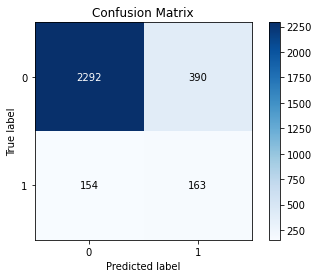

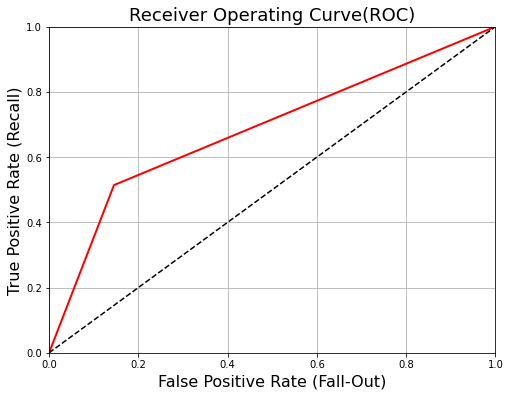

In [58]:
# Ensemble model 4

voting_model_4= VotingClassifier(estimators=[('lr',logreg), ('rf',rf), ('lightgbm', light_grid)], voting='soft', n_jobs=-1)

voting_model_4.fit(X_train_res, y_train_res)

y_pred_vot = voting_model_4.predict(X_test)
model_metrics(y_test,y_pred_vot)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot) 
plot_roc_curve(fpr, tpr)

In [59]:
# ensemble 모델 저장
joblib.dump(voting_model_4, './voting_model_4.pkl')

['./voting_model_4.pkl']

Accuracy of  model :  0.786
f1 score:  0.818
auc  score:  0.7039
recall score:  0.786
precision  score:  0.873


              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2682
           1       0.27      0.60      0.37       317

    accuracy                           0.79      2999
   macro avg       0.61      0.70      0.62      2999
weighted avg       0.87      0.79      0.82      2999



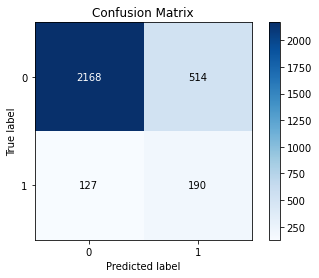

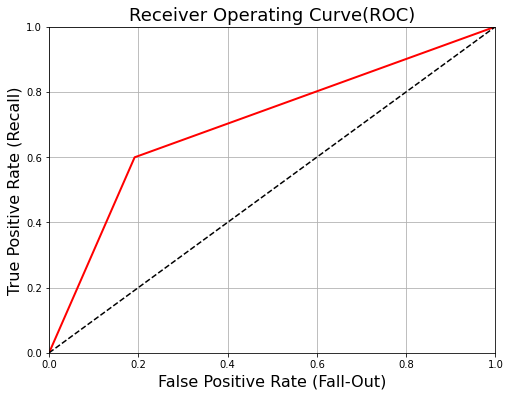

In [60]:
# Ensemble model 5

voting_model_5= VotingClassifier(estimators=[('lr',logreg), ('rf',rf), ('adaboost', adab_grid)], voting='soft', n_jobs=-1)

voting_model_5.fit(X_train_res, y_train_res)

y_pred_vot = voting_model_5.predict(X_test)
model_metrics(y_test,y_pred_vot)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vot) 
plot_roc_curve(fpr, tpr)

In [61]:
# ensemble 모델 저장
joblib.dump(voting_model_5, './voting_model_5.pkl')

['./voting_model_5.pkl']

In [76]:
X_minmax

array([[0.18872017, 0.77777778, 0.53248588, ..., 0.99577524, 0.07160494,
        1.        ],
       [0.04555315, 0.93296682, 0.81102362, ..., 0.25001307, 0.        ,
        0.        ],
       [0.01952278, 0.81632653, 0.25555556, ..., 0.50002615, 0.12592593,
        0.        ],
       ...,
       [0.0845987 , 1.        , 0.6561086 , ..., 0.92312519, 0.13703704,
        0.        ],
       [0.26681128, 1.        , 0.99043716, ..., 0.81399605, 0.07457627,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.99708749, 0.06666667,
        0.        ]])

In [ ]:
#%%
# SVM
param_range = [0.01, 0.1, 1, 10, 100]
parameters = [{'C': param_range, 'gamma':param_range}]

clf_svm = GridSearchCV(SVC(), parameters, cv=3, n_jobs=-1)
clf_svm.fit(X_train_res, y_train_res.ravel())



In [ ]:
clf_svm.best_params_

NameError: name 'clf_svm' is not defined

In [ ]:
clf_svm_best = SVC(C=, kernel=, degree=, gamma=)
clf_svm_best.fit(X_train_res, y_train_res.ravel())

y_pred_svm = clf_svm_best.predict(X_test)

model_metrics(y_test,y_pred_svm)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm) 
plot_roc_curve(fpr, tpr)